In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
from scipy.io import loadmat

### KMeans Algorithm

In [2]:
def kmeans_init_centroids(X, K):
    '''
    Randomly initialize K centroids from X
    '''
    m, n = X.shape
    centroids = np.zeros((K, n))
    
    for i in range(K):
        centroids[i, :] = X[np.random.randint(0, m), :]
    return centroids

In [3]:
def find_closest_centroids(X, centroids):
    '''
    find those centroids which are closest to each centroid
    return : c (m x 1) -> index of centroid which is closest to X(i)
             c[i] = j; that minimizes, norm(X[i] - centroids[j]) ** 2
    '''
    K = centroids.shape[0]
    m, n = X.shape
    c = np.zeros((m, 1))
    
    for i in range(m):
        min_dist = float('inf')
        for j in range(K):
            # dist = np.linalg.norm(X[i, :] - centroids[j, :]) ** 2
            dist = np.sum((X[i, :] - centroids[j, :]) ** 2)
            if dist < min_dist:
                min_dist = dist
                c[i] = j
    return c

In [4]:
def compute_centroids(X, c, K):
    '''
    X : Data points.
    c : Index of centroids of each data points
    K : No. of clusters
    return : New centroids by computing the means of the 
             data points (X) assigned to each centroid.
    '''
    m, n = X.shape
    centroids = np.zeros((K, n))
    
    count = np.zeros((K, 1))
    for i in range(m):
        idx = int(c[i, 0])
        centroids[idx, :] += X[i, :]
        count[idx] += 1
    
    centroids = centroids / count
    return centroids

In [5]:
def kmeans(X, K, no_iter=1):
    '''
    X : Data points.
    K : No. of clusters
    return : c, centroids
             c -> Index of clusters assigned each data points.
             centroids -> Last position of centroids.
    '''
    centroids = kmeans_init_centroids(X, K)
    for i in range(no_iter):
        # Cluster assignment step
        c = find_closest_centroids(X, centroids)
        
        # Move centroid step
        centroids = compute_centroids(X, c, K)
    
    return c, centroids

### Examples

In [6]:
mat = loadmat('..\datasets\ex7data2.mat')
X = mat['X']
X.shape

(300, 2)

In [11]:
K = 3
y, centroids = kmeans(X, K=K, no_iter=10)

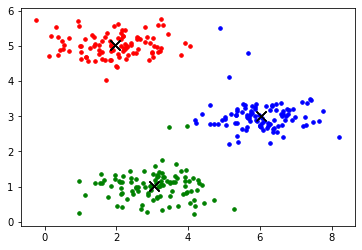

In [12]:
# Visualizing
colors = 'rgbcmy'
for k in range(K):
    plt.scatter(X[(y == k).ravel(), 0], X[(y == k).ravel(), 1], c=colors[k % len(colors)], marker='.', s=50)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100)

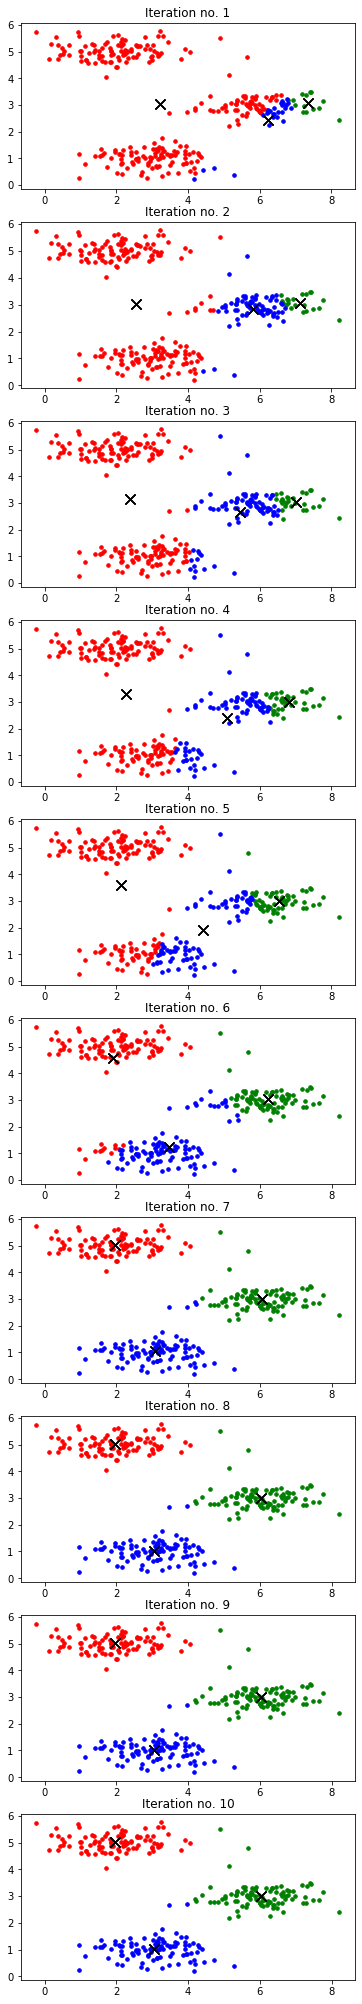

In [9]:
# Visualize the steps
no_iter = 10
fig, ax = plt.subplots(no_iter, 1, figsize=(6,36))
colors = 'rgbcmy'

centroids = kmeans_init_centroids(X, K)
for i in range(no_iter):
    y = find_closest_centroids(X, centroids)
    centroids = compute_centroids(X, y, K)
    for k in range(K):
        ax[i].scatter(X[(y == k).ravel(), 0], X[(y == k).ravel(), 1], c=colors[k % len(colors)], marker='.', s=50)
        ax[i].scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100)
        ax[i].set_title('Iteration no. ' + str(i+1))

### Image Compression with K-means
<b>RGB encoding</b>

It's a straightforward `24-bit color representation` of an image, each pixel is represented as `three 8-bit unsigned integers (0-255)` that specifies red, green & blue intensity values. A total of `2^24 = 16, 777, 216 colors` can be represented in the color palatte.

In this example, no. of `color is reduced to 16`. So, only `4 bits` are necessary to represent 16 possibilities.

In [89]:
mat2 = loadmat('bird_small.mat')
A = mat2['A']
A.shape

(128, 128, 3)

In [90]:
# Preprocess & reshape image
X2 = (A / 255).reshape(128 * 128, 3)
X2.shape

(16384, 3)

In [91]:
# Running k-means on the data
'''
Use the K-means algorithm to find the 16 colors 
that best group (cluster) the pixels 
in the 3-dimensional RGB space.
'''
K2 = 16
idx2, centroids2 = kmeans(X2, K2, no_iter=10)
idx2 .shape, centroids2.shape

((16384, 1), (16, 3))

In [94]:
'''
We can now recover the image from indices (idx) 
by mapping each pixel to the centroid value.
'''
X2_recovered = np.empty(X2.shape)
X2_recovered = centroids2[idx2.ravel().astype(int), :]

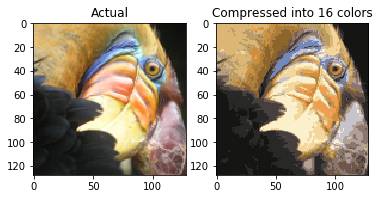

In [98]:
X2 = X2.reshape(128, 128, 3)
X2_recovered = X2_recovered.reshape(128, 128, 3)
# Displaying the difference
fig, ax = plt.subplots(1, 2)
ax[0].imshow(X2)
ax[0].set_title('Actual')
ax[1].imshow(X2_recovered)
ax[1].set_title(f'Compressed into {K2} colors')
plt.show()